# Aggregating Data & Elasticity

+ Data Science Practicum for Business with Python
+ Wayne State University
+ Casey Whorton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
air = pd.read_csv('C:/Users/casey/OneDrive/Desktop/airfare.csv')
air = air[air.origin == '"DETROIT, MI"']

In [1]:
#df = pd.read_csv('C:/Users/casey/OneDrive/Desktop/datasci_practicum.csv')
#df.head()

# A Quick Intro to Elasticity
## (...and why we need to aggregate our data)

+ Elasticity is an economics term
+ Refers to the change of demand to a change of price
+ Here, when we say "demand" we mean sales of vehicles, but generally means the product is in demand...people want to buy it
+ Sometimes, we'll use the word "quantity" to mean demand
+ Elasticity is defined as the ratio of the percentage change in quantity to the percentage change in demand
    + Elasticity = (change in quantity)/(change in price)
+ How do you tell if there is a change in quantity with the data we currently have now?.........

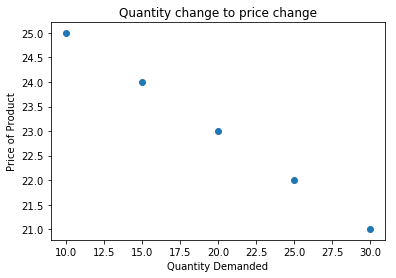

In [4]:
quantity = np.arange(10,35,5)
price = np.arange(25,20,-1)
plt.scatter(quantity,price)
plt.title('Quantity change to price change')
plt.xlabel('Quantity Demanded')
plt.ylabel('Price of Product')
plt.show()

In [5]:
change_quantity = (20-15)/15
change_price = (23-24)/24
print(change_quantity/change_price)

-8.0


In [6]:
change_quantity = (25-20)/20
change_price = (22-23)/23
print(change_quantity/change_price)

-5.75


In [7]:
change_quantity = (30-25)/25
change_price = (21-22)/22
print(change_quantity/change_price)

-4.4


In [8]:
change_quantity = (35-30)/30
change_price = (20-21)/21
print(change_quantity/change_price)

-3.5


In [9]:
change_quantity = (50-45)/45
change_price = (17-18)/18
print(change_quantity/change_price)

-2.0


Remember what our data looks like.............

# Aggregating Data

+ Group by function
+ Works like a SQL "group by" clause
+ Need to specifiy the columns to group by
    + Then, an aggregation function to aggregate the remaining columns
+ Aggregation functions in python commonly used:
    + sum
    + mean
    + median
    + max
    + min
    + count

In [10]:
air.groupby('year').sum()

,id,distance,passenger,fair,bmktshr,ldist,y98,y99,y100,lfare,ldistsq,concen,lpassen
year,,,,,,,,,,,,,
1997,22854,40263,21215,7026,26.7958,262.869067,0,0,0,200.335041,1789.12839,26.7958,235.270416
1998,22854,40263,22349,6944,25.4464,262.869067,39,0,0,199.747368,1789.12839,25.4464,235.625334
1999,22854,40263,24576,6992,24.3589,262.869067,0,39,0,199.990650,1789.12839,24.3589,237.810807
2000,22854,40263,23395,7681,23.2989,262.869067,0,0,39,204.444492,1789.12839,23.2989,236.201205


**To Do**
+ group the dataframe by the 'year' column
+ use the median function as the aggregate function

**To Do**
+ Instead of a single column, pass a list to the group by function
+ include the names 'year' and 'destination' separated by commas

In [13]:
# Write code here



**What if we want to do more than average all values or sum all values?**

In [14]:
# This part is a little more complicated
# The idea is very simple, but the syntax is different and takes getting used to
# The grouping column is still the same, but we have to specify what aggregator function is applied to which column
# This can be very time consuming

air.groupby('year').agg({'distance':'mean','passenger':'sum'})

,distance,passenger
year,,
1997,1032.384615,21215
1998,1032.384615,22349
1999,1032.384615,24576
2000,1032.384615,23395


**To Do**
+ Import the dataframe for the class
+ Group the data using a group by function in pandas
+ Here is what I want it to look like
    + Group by x_body_mdl_desc
    + Aggregate the MSRP column by average
    + Count the number of rows - corresponds to sales

**To Do**
+ Create a new dataframe that is the result of grouping our data set by nameplate_case and solddate
+ Take the average MSRP and the count of rows

In [16]:
# Write your code here



# Elasticity

**To Do**
+ Display the relationship between the # of passengers on a flight and the average fair on the flight


In [68]:
# Write code here (use seaborn.regplot)


**Of course, there are many other factors, but this picture works well in this scenario**

In [21]:
# Run this code

x = np.log(air.passenger)
x.plot()


**To Do**
+ Look at the documentation on the differences between level-level & log-log models
+ Plot the relationship between the logged number of passengers and the logged fair of the plane ticket
    + What is the general relationship here?
    + Referring to the documentation, what would the slope of the line mean in terms of a business problem?
        + Remember, this is looking at the number of passengers on a flight and the price of a ticket...basically supply and demand (we know that the # of passengers might determine price and vice versa, but this works for this problem)

In [67]:
# Write code here (use seaborn.regplot)

**To Do**
+ Run the code cell below
+ Look at the coefficient on 'Fair'
+ What is the interpretation and what does it mean for this problem?

In [27]:
exog = np.log(air.fair)
exog = sm.add_constant(exog)
y = np.log(air.passenger)
model_fit = sm.OLS(y,exog).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              passenger   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     19.60
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           1.80e-05
Time:                        19:57:15   Log-Likelihood:                -174.93
No. Observations:                 156   AIC:                             353.9
Df Residuals:                     154   BIC:                             360.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1080      0.917     11.022      0.000       8.296      11.920
fair          -0.7855      0.177     -4.427      0.000      -1.136      -0.435
==============================================================================
Omnibus:                        1.218   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.205
Skew:                           0.104   Prob(JB):                        0.547
Kurtosis:                       2.623   Cond. No.                         82.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

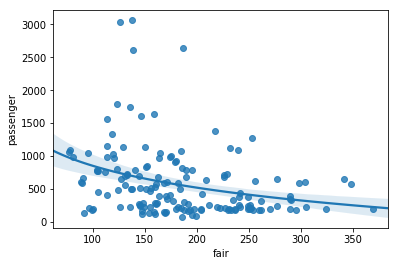

In [54]:
# Run this...look at the logx

sns.regplot(y = (air.passenger), x = air.fair,logx=True)

**To Do**
+ Create a vector for price using the numpy arange function
    + Use increments of 25 between 100 and 350
    + The function looks like this: numpy.arange(start, stop, increment)
+ Create a function for quantity (passenger) that uses the price vector the coefficients we fit befor to make our quantity (demand) function
    + Hint: We are just writing the regression formula from the model summary above
+ Plot it using the plt.scatter function
    + The function goes like this: plt.scatter(x = "the x axis variable", y = "the y axis variable")

Notice in the above chart that, when there is a fitted elasticity that is constant, there is a diminishing return on lowering price to gain demand.  For each increase of price (going to the right) we see a marginal decrease of quantity or demand.  This is totally expected from this chart, and this is a good assumption to start with for creating elasticity models.

# Homework

+ Aggregate the dataframe for the project by nameplate and solddate
+ Use the count of rows for to represent sales
+ Use the average MSRP to represent price (because it basically is)
+ Create a log-log model between the sales and MSRP and display the model summary
+ Interpret the coefficient on MSRP in terms of the problem
+ Plot the logged relationship between the values
+ Create a vector for prices in the price range of the cars being sold in the dataset
+ Create a quantity function using the fitted model
+ Plot the results using a scatterplot
+ Create a multiple linear regression model with any inputs you want to use
    + Make sure the MSRP is one of them
+ Display the fitted model summary and interpret the coefficient on price now....did it change?....Does it still make sense?
    + What would you do differently with the data before fitting this model?
+ Write down your results and thoughts and share them with your team in the group chat
+ By the way, say hello to your team on team chat
+ Submit your homework by saving a copy of this notebook with all of your work in it to your github and notify me to review it
+ Make sure your name is on it somewhere